## 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

### 60. 単語ベクトルの読み込みと表現
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
# !pip install gensim
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
print(model['United_States'])
print(model['United_States'].shape)

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

### 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．<br>reference: https://radimrehurek.com/gensim/models/keyedvectors.html

In [2]:
import numpy as np

print(model.similarity('United_States', 'U.S.'))

vec1 = model['United_States']
vec2 = model['U.S.']
cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print(cos_sim)

0.73107743
0.7310775


### 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
print(model.similar_by_key('United_States', topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


### 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [46]:
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


### 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [49]:
from tqdm import tqdm
with open('./questions-words.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

new_lines = []
for i in tqdm(range(len(lines))):
    l = lines[i]
    words = l.split()
    if len(words) != 4:
        new_lines.append(l)
    else:
        most_similar = model.most_similar(positive=[words[1], words[2]], negative=[words[0]], topn=1)[0]
        new_lines.append(l.strip() + " " + most_similar[0] + " " + str(most_similar[1]) + "\n")

with open('./answer.txt', 'w', encoding='utf-8') as f:
    f.writelines(new_lines)


100%|██████████| 19558/19558 [44:37<00:00,  7.30it/s] 


### 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [4]:
with open('./answer.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

sem_cnt = 0
sem_acc = 0
syn_cnt = 0
syn_acc = 0
is_sem = True
for i in range(len(lines)):
    l = lines[i]
    words = l.split()
    if len(words) != 6:
        if 'gram' in l:
            is_sem = False
    else:
        if is_sem:
            sem_cnt += 1
            if words[3] == words[4]:
                sem_acc += 1
        else:
            syn_cnt += 1
            if words[3] == words[4]:
                syn_acc += 1

sem_acc /= sem_cnt
syn_acc /= syn_cnt
print(f'semantic: {sem_acc}')
print(f'syntactic: {syn_acc}')

semantic: 0.7308602999210734
syntactic: 0.7400468384074942


### 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [28]:
# !pip install scipy
from scipy.stats import spearmanr
from scipy.stats import rankdata
import numpy as np
import pandas as pd

df = pd.read_csv('./wordsim353/combined.csv')
human_sim = np.array(df['Human (mean)'])
human_rank = rankdata(-human_sim, method='min')
model_sim = np.empty(0)

for t in df.itertuples():
    sim = model.similarity(t[1], t[2])
    model_sim = np.append(model_sim, sim)

model_rank = rankdata(-model_sim, method='min')

corr, p = spearmanr(human_rank, model_rank)
print(corr)

0.7000166486272194


### 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [3]:
from sklearn.cluster import KMeans

countries = set()
with open('./questions-words.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

for i in range(1,len(lines)):
    l = lines[i]
    words = l.split()
    if len(words) != 4:
        if 'currency' in l:
            break
        else:
            continue
    else:
        countries.add(words[1])
        countries.add(words[3])

countries = list(countries)
country_vecs = []
country_dict = {}
for i in range(len(countries)):
    country = countries[i]
    vec = model[country]
    country_vecs.append(vec)
    country_dict[country] = vec

km = KMeans(n_clusters=5, random_state=23, init='random')
km.fit(country_vecs)
clusters = km.predict(country_vecs)
print(countries)
print(clusters)

country_class = [[], [], [], [], []]
for i in range(len(clusters)):
    country_class[clusters[i]].append(countries[i])

with open('./clustering_result.txt', 'w', encoding='utf-8') as f:
    for i in range(5):
        f.write(f'CLASS {i}\n')
        for c in country_class[i]:
            f.write(c+'\n')
        f.write('-----------\n')


['Belize', 'Japan', 'Switzerland', 'England', 'Austria', 'Lithuania', 'Sweden', 'Philippines', 'Suriname', 'Iraq', 'Egypt', 'Taiwan', 'Libya', 'Jordan', 'Tajikistan', 'Norway', 'Niger', 'Thailand', 'Pakistan', 'Algeria', 'Gambia', 'Canada', 'Kazakhstan', 'Armenia', 'Estonia', 'Turkey', 'Malawi', 'Tuvalu', 'Fiji', 'Albania', 'Serbia', 'Latvia', 'Macedonia', 'France', 'Moldova', 'Greenland', 'Denmark', 'Tunisia', 'Romania', 'Mauritania', 'Poland', 'Bahrain', 'Liberia', 'Gabon', 'Cyprus', 'Rwanda', 'Bangladesh', 'Turkmenistan', 'Ghana', 'Zimbabwe', 'Russia', 'Mali', 'Bahamas', 'Qatar', 'Montenegro', 'Guyana', 'Croatia', 'Finland', 'Eritrea', 'Honduras', 'Ireland', 'Uruguay', 'Germany', 'Portugal', 'Botswana', 'Nepal', 'Laos', 'Sudan', 'Nicaragua', 'Belarus', 'Syria', 'Guinea', 'Ukraine', 'Kenya', 'Morocco', 'Malta', 'Jamaica', 'Angola', 'Namibia', 'Bulgaria', 'Georgia', 'Senegal', 'Kyrgyzstan', 'Nigeria', 'Slovenia', 'Peru', 'Cuba', 'Chile', 'China', 'Zambia', 'Samoa', 'Italy', 'Belgium',

c:\Python\hlab2023-nlp100\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

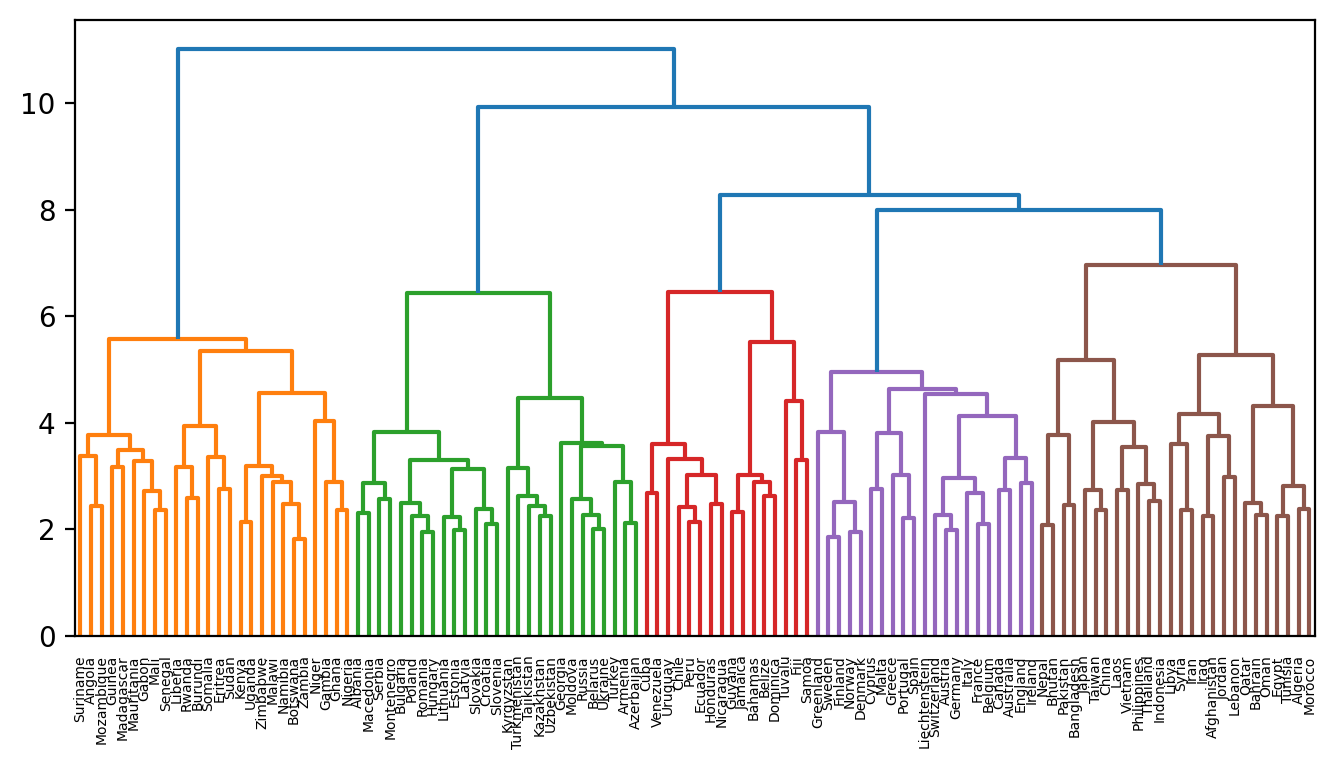

In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
 
linkage_result = linkage(list(country_dict.values()), method='ward', metric='euclidean')
plt.figure(num=None, figsize=(8, 4), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=list(country_dict.keys()))
plt.show()

### 69. t-SNEによる可視化

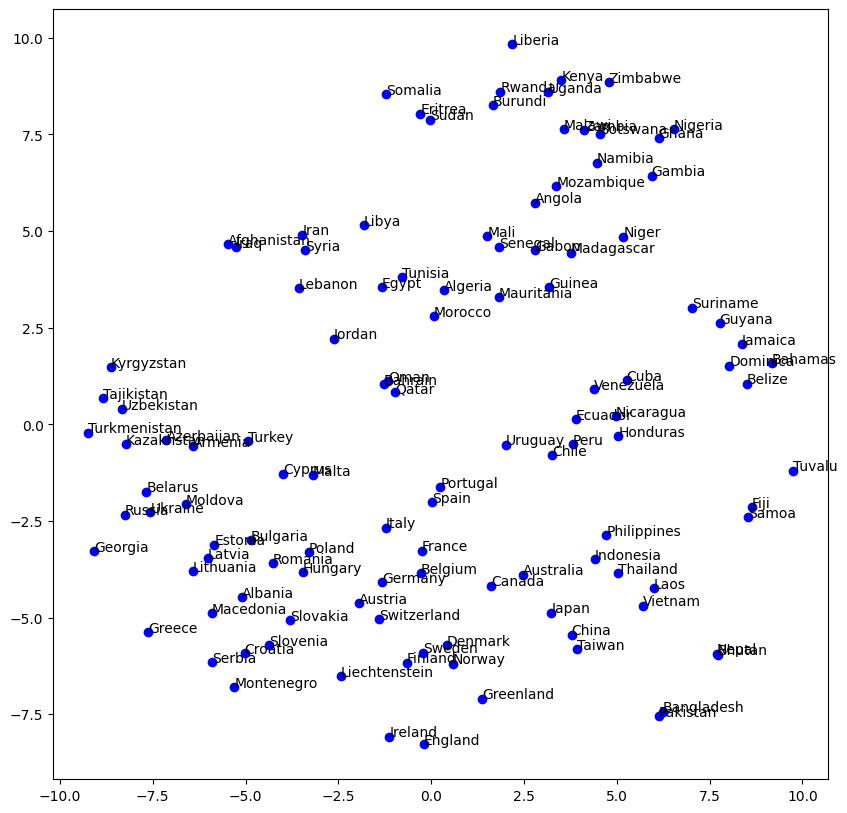

In [37]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state = 23, perplexity = 30, n_iter = 1000)
embedded = tsne.fit_transform(np.array(country_vecs))

fig, ax = plt.subplots(figsize=(10,10))
# plt.figure(figsize=(6,6))
ax.scatter(embedded[:,0], embedded[:,1], color="b")

for i in range(len(embedded)):
    ax.annotate(countries[i], (embedded[i][0], embedded[i][1]), fontsize=10)

# plt.show()